In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
from scipy.interpolate import interp1d

In [4]:
tf = pd.read_csv("./Desktop/MW.csv")
sf = pd.read_csv("./Desktop/MNIST.csv")
df = pd.read_csv("./Desktop/Manaus.csv")

In [98]:
tf.head()

,Column1,Column2,Column3,Column4,Column5,Column6,Column7
0,0,0,MW,FP1,0,1017,"38,48,51,44,48,56,56,41,20,-3,-9,-1,6,5,6,17,2..."
1,1,1,MW,FP1,1,889,"83,74,65,65,66,55,43,25,18,20,26,33,41,38,28,3..."
2,2,2,MW,FP1,4,1017,"19,10,-2,-9,-5,3,8,7,8,2,-10,-21,-22,-27,-30,-..."
3,3,3,MW,FP1,1,1017,"17,29,36,26,21,17,17,13,17,21,25,26,20,5,-5,-1..."
4,4,4,MW,FP1,8,952,"77,74,69,70,76,75,76,75,67,66,76,93,98,82,55,3..."


In [99]:
drop_list = ["Column2", "Column3", "Column4"]
tf.drop(drop_list, axis=1, inplace=True)

In [100]:
tf["Column7"][4][6]
listy = []
mark = []

In [101]:
for x in range(len(tf["Column7"])):
    numbers = [int(num) for num in tf["Column7"][x].split(',')]
    listy.append(numbers)

In [102]:
def extend_array_linear(array, new_length):
    # Original array length
    old_length = len(array)
    
    # Create a new array of desired length
    new_array = np.zeros(new_length)
    
    # Calculate indices for linear interpolation
    indices = np.linspace(0, old_length - 1, old_length)
    new_indices = np.linspace(0, old_length - 1, new_length)
    
    # Perform linear interpolation
    new_array = np.interp(new_indices, indices, array)
    return new_array
    
    return new_array
for x in listy:
    mark.append(extend_array_linear(x, 1023))

In [103]:
print(len(mark[0]))

1023


In [116]:
data = pd.DataFrame(mark)
data = data.transpose()

In [117]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,67625,67626,67627,67628,67629,67630,67631,67632,67633,67634
0,38.000000,83.000000,19.000000,17.000000,77.000000,60.000000,-68.000000,75.000000,123.000000,25.000000,...,-43.000000,98.000000,1.000000,56.000000,89.000000,138.000000,4.000000,96.000000,-30.000000,41.000000
1,47.941292,75.180039,10.052838,28.929550,74.208415,59.007828,-65.208415,69.046967,109.097847,24.069472,...,-39.989237,85.962818,0.036204,35.972603,124.024462,134.988258,4.988258,163.044031,4.047945,27.013699
2,50.964775,67.360078,-1.859100,35.917808,69.694716,59.000000,-56.389432,53.250489,90.031311,5.056751,...,-28.935421,47.943249,37.052838,7.974560,148.939335,122.947162,-7.009785,207.943249,53.062622,41.068493
3,44.123288,65.000000,-8.876712,26.176125,69.791585,55.093933,-52.625245,35.422701,71.866928,-14.623288,...,4.105675,18.909002,64.011742,-4.964775,117.950098,95.891389,-11.997065,178.853229,84.997065,76.035225
4,47.906067,65.475538,-5.093933,21.117417,74.332681,36.594912,-57.776908,24.344423,61.622309,-13.223092,...,39.972603,-12.035225,68.003914,7.070450,100.996086,58.917808,-11.023483,128.941292,83.953033,87.968689


In [118]:
scaler = StandardScaler()

# Fit the scaler to your data and transform it in place
data[:] = scaler.fit_transform(data)

In [119]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,67625,67626,67627,67628,67629,67630,67631,67632,67633,67634
0,-0.020241,0.879329,-0.387587,-0.372105,1.035979,0.589765,-2.734753,0.419031,2.334289,-0.108690,...,-1.221893,1.112186,-0.647291,0.426232,1.006910,0.560882,-0.381065,0.860649,-1.058903,0.130763
1,0.171972,0.755631,-0.593806,-0.078679,0.970354,0.566628,-2.659880,0.360890,1.933423,-0.136183,...,-1.177721,0.904966,-0.664546,0.076877,1.645908,0.544134,-0.368721,1.777552,-0.486368,-0.105850
2,0.230431,0.631932,-0.868359,0.093208,0.864247,0.566446,-2.423347,0.206611,1.383643,-0.697922,...,-1.015547,0.250456,-0.001851,-0.411518,2.100464,0.477177,-0.518585,2.391600,0.337841,0.131921
3,0.098152,0.594599,-1.030105,-0.146404,0.866524,0.475360,-2.322389,0.032494,0.859876,-1.279376,...,-0.530788,-0.249370,0.480783,-0.637230,1.535086,0.326728,-0.580880,1.993761,0.874836,0.723470
4,0.171291,0.602122,-0.942917,-0.270831,0.973276,0.043980,-2.460561,-0.075703,0.564474,-1.238007,...,-0.004571,-0.782077,0.552254,-0.427289,1.225771,0.121129,-0.568719,1.311158,0.857280,0.925354


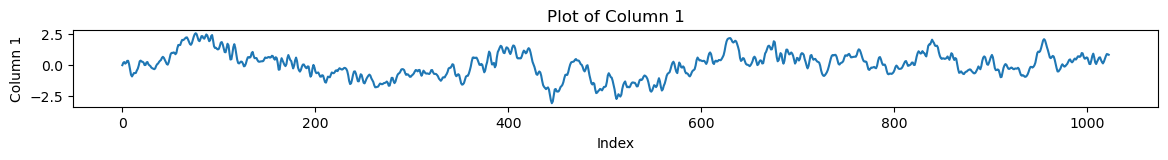

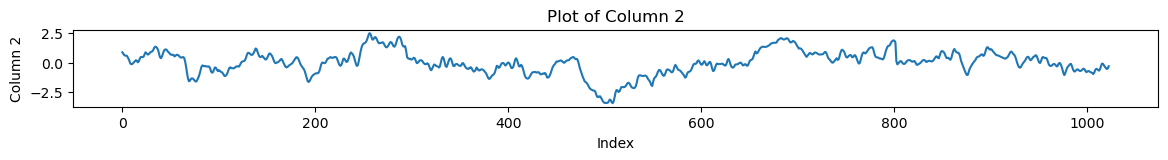

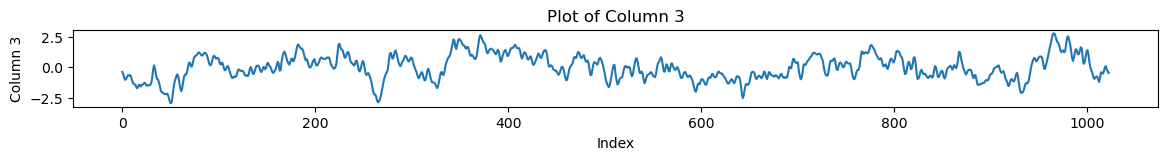

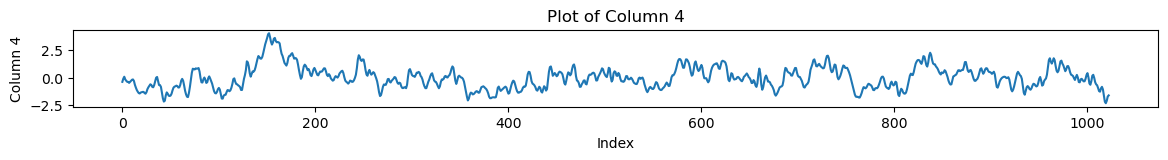

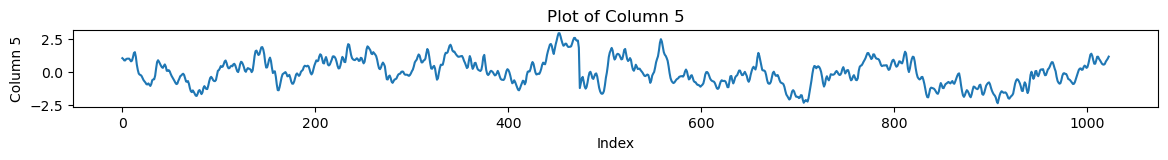

In [124]:
num_cols = 5

# Create separate figures for each column
for col in range(num_cols):
    fig, ax = plt.subplots(figsize=(14, 1))  # Adjust figsize as needed
    ax.plot(data.iloc[:, col])  # Plot the column data
    ax.set_xlabel("Index")
    ax.set_ylabel(f"Column {col+1}")  # Set y-axis label with column number
    ax.set_title(f"Plot of Column {col+1}")  # Set title
    plt.show()  # Display the plot

In [77]:
sf.info()
sf.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13533 entries, 0 to 13532
Columns: 1025 entries, label to FP1-1023
dtypes: int64(1025)
memory usage: 105.8 MB


label       0
FP1-0       0
FP1-1       0
FP1-2       0
FP1-3       0
           ..
FP1-1019    0
FP1-1020    0
FP1-1021    0
FP1-1022    0
FP1-1023    0
Length: 1025, dtype: int64

In [78]:
scaler = StandardScaler()
standardized_values = scaler.fit_transform(sf)
sf = pd.DataFrame(standardized_values, columns=sf.columns)

In [79]:
z_scores = stats.zscore(sf)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 5).all(axis=1)
sf = sf[filtered_entries]

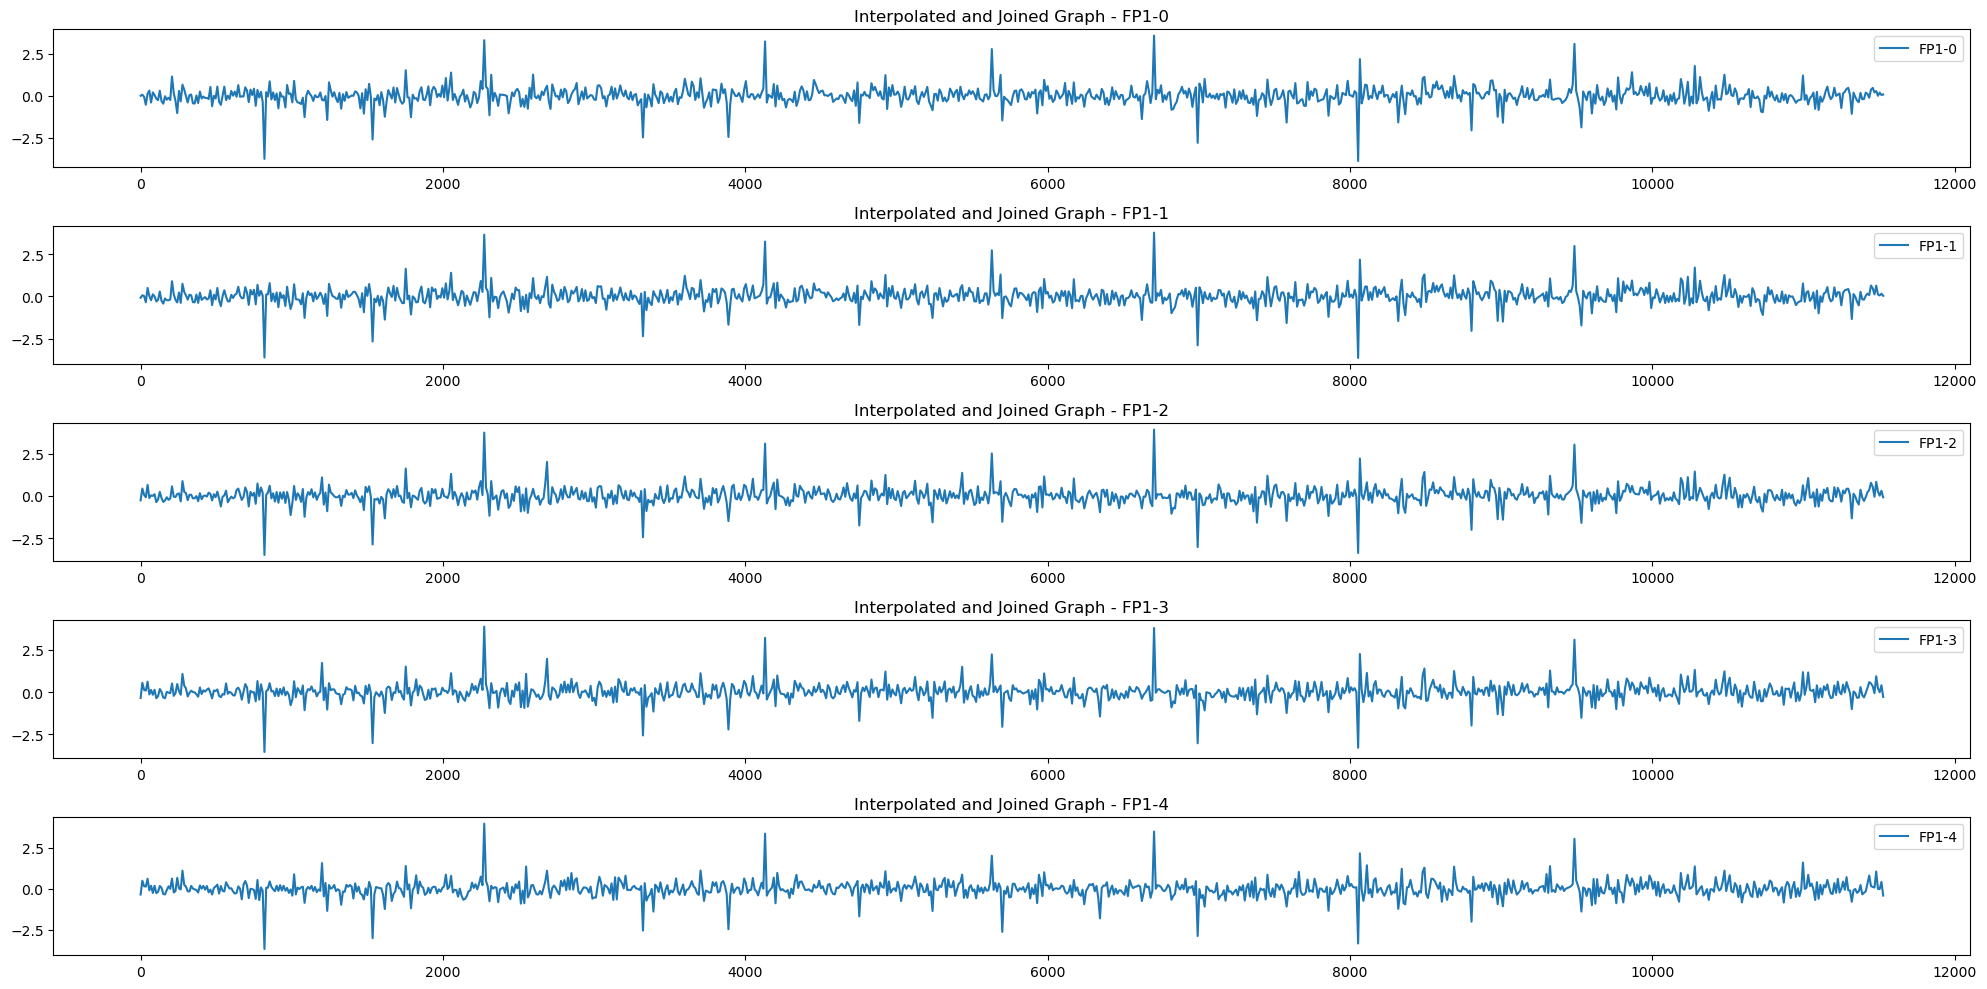

In [80]:
fig, axs = plt.subplots(5, 1, figsize=(20, 10))

# Interpolate and plot each column in separate subplots
for x in range(1,6):
    x_data = np.arange(len(sf))
    y_data = sf[sf.columns[x]]

    # Interpolate the data
    f = interp1d(x_data, y_data, kind='cubic')
    x_interp = np.linspace(x_data.min(), x_data.max(), 1000)
    y_interp = f(x_interp)

    # Plot the interpolated data in the respective subplot
    axs[x-1].plot(x_interp, y_interp, label=sf.columns[x])
    axs[x-1].set_title('Interpolated and Joined Graph - ' + sf.columns[x])
    axs[x-1].legend()

plt.tight_layout()  # Adjust subplots to prevent overlap
plt.show()

In [7]:
df.head()

,index,Data,Hora,"PRECIPITAÃ‡ÃƒO TOTAL, HORÃRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃƒO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃƒO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/mÂ²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (Â°C)",TEMPERATURA DO PONTO DE ORVALHO (Â°C),...,"VENTO, DIREÃ‡ÃƒO HORARIA (gr) (Â° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0,09-05-2000,00:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
1,1,09-05-2000,01:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
2,2,09-05-2000,02:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
3,3,09-05-2000,03:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
4,4,09-05-2000,04:00,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


In [8]:
df.replace(-9999, pd.NA, inplace=True)
df.isnull().sum()

index                                                        0
Data                                                         0
Hora                                                         0
PRECIPITAÃ‡ÃƒO TOTAL, HORÃRIO (mm)                      12437
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    12450
PRESSÃƒO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)         12937
PRESSÃƒO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)        12937
RADIACAO GLOBAL (Kj/mÂ²)                                 21451
TEMPERATURA DO AR - BULBO SECO, HORARIA (Â°C)            12437
TEMPERATURA DO PONTO DE ORVALHO (Â°C)                    12525
TEMPERATURA MÃXIMA NA HORA ANT. (AUT) (Â°C)             12932
TEMPERATURA MÃNIMA NA HORA ANT. (AUT) (Â°C)             12932
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (Â°C)        13021
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (Â°C)        13021
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                 13020
UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)               

In [9]:
cols_to_impute = df.columns[3:20]

# Calculate the mean for those columns
mean_values = df[cols_to_impute].mean()

# Replace missing values with the mean of each column
df[cols_to_impute] = df[cols_to_impute].fillna(mean_values)
df.isnull().sum()
df.head()

,index,Data,Hora,"PRECIPITAÃ‡ÃƒO TOTAL, HORÃRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃƒO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃƒO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/mÂ²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (Â°C)",TEMPERATURA DO PONTO DE ORVALHO (Â°C),...,"VENTO, DIREÃ‡ÃƒO HORARIA (gr) (Â° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0,09-05-2000,00:00,0.205171,1003.915678,1004.285524,1003.647922,1481.390225,27.065429,23.041213,...,149.665173,3.696607,1.22223,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
1,1,09-05-2000,01:00,0.205171,1003.915678,1004.285524,1003.647922,1481.390225,27.065429,23.041213,...,149.665173,3.696607,1.22223,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
2,2,09-05-2000,02:00,0.205171,1003.915678,1004.285524,1003.647922,1481.390225,27.065429,23.041213,...,149.665173,3.696607,1.22223,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
3,3,09-05-2000,03:00,0.205171,1003.915678,1004.285524,1003.647922,1481.390225,27.065429,23.041213,...,149.665173,3.696607,1.22223,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
4,4,09-05-2000,04:00,0.205171,1003.915678,1004.285524,1003.647922,1481.390225,27.065429,23.041213,...,149.665173,3.696607,1.22223,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


In [10]:
def hour_to_number(hour_str):
    hour, minute = map(int, hour_str.split(':'))
    return hour + minute / 60
def date_to_number(date_str):
    day, month, year = map(int, date_str.split('-'))
    return year *365 + month *12 + day

df['Data'] = df['Data'].apply(date_to_number)
df['Hora'] = df['Hora'].apply(hour_to_number)
drop_list = ["index", "region", "state", "station", "station_code", "latitude", "longitude", "height"]
df.drop(drop_list, axis=1, inplace=True)

In [11]:
z_scores = stats.zscore(df)
abs_z_scores = abs(z_scores)
filtered_entries = (abs_z_scores < 5).all(axis=1)
dfa = df[filtered_entries]

In [13]:
scaler = StandardScaler()
standardized_values = scaler.fit_transform(df)
df = pd.DataFrame(standardized_values, columns=df.columns)
df.head()

,Data,Hora,"PRECIPITAÃ‡ÃƒO TOTAL, HORÃRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃƒO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃƒO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/mÂ²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (Â°C)",TEMPERATURA DO PONTO DE ORVALHO (Â°C),TEMPERATURA MÃXIMA NA HORA ANT. (AUT) (Â°C),TEMPERATURA MÃNIMA NA HORA ANT. (AUT) (Â°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (Â°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (Â°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÃ‡ÃƒO HORARIA (gr) (Â° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
0,-1.641182,-1.661325,-2.443716e-16,-6.951951e-13,9.156971e-13,3.868467e-13,0.0,1.551311e-15,4.331924e-14,4.574726e-15,3.986947e-14,3.966211e-14,8.686362e-15,0.0,-1.371184e-15,0.0,0.0,-4.919248e-15,-4.281119e-15
1,-1.641182,-1.516862,-2.443716e-16,-6.951951e-13,9.156971e-13,3.868467e-13,0.0,1.551311e-15,4.331924e-14,4.574726e-15,3.986947e-14,3.966211e-14,8.686362e-15,0.0,-1.371184e-15,0.0,0.0,-4.919248e-15,-4.281119e-15
2,-1.641182,-1.372399,-2.443716e-16,-6.951951e-13,9.156971e-13,3.868467e-13,0.0,1.551311e-15,4.331924e-14,4.574726e-15,3.986947e-14,3.966211e-14,8.686362e-15,0.0,-1.371184e-15,0.0,0.0,-4.919248e-15,-4.281119e-15
3,-1.641182,-1.227936,-2.443716e-16,-6.951951e-13,9.156971e-13,3.868467e-13,0.0,1.551311e-15,4.331924e-14,4.574726e-15,3.986947e-14,3.966211e-14,8.686362e-15,0.0,-1.371184e-15,0.0,0.0,-4.919248e-15,-4.281119e-15
4,-1.641182,-1.083473,-2.443716e-16,-6.951951e-13,9.156971e-13,3.868467e-13,0.0,1.551311e-15,4.331924e-14,4.574726e-15,3.986947e-14,3.966211e-14,8.686362e-15,0.0,-1.371184e-15,0.0,0.0,-4.919248e-15,-4.281119e-15
